###npzについて

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

衛星画像は通常GeoTIFFやNetCDFのような形式で保存されますが、MODIS衛星画像をnumpy固有の形式.**npz**を使ってローカルに保存し、numpyの配列に読み込みます。

In [3]:
arr_modis = np.load("/content/drive/MyDrive/rs/modis_cube.npz")["nadir"]

arr_modis.shape

(2400, 2400, 7)

* このファイルは、MODIS Terra衛星とAcqua衛星が8日間に渡って撮影した画像を合成したものです。画像は、2018年7月中旬頃のフランス南西部とスペイン北部の領域に対応しています。各ピクセルの解像度は500メートルで、7つのスペクトルバンドがあります： `[赤、近赤外（nir）、青、緑、短波長赤外（swir）1、swir2、swir3]`。

In [10]:
print(arr_modis)

[[[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  3   0  18 ...   0   1   2]
  [  3   0  18 ...   0   4   3]
  [  3   0  16 ...   0   2   2]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  2   0  17 ...   0   1   3]
  [  3   0  16 ...   0   4   2]
  [  2   0  16 ...   0   4   3]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [  2   0  14 ...   0   2   3]
  [  2   0  17 ...   0   4   3]
  [  2   0  17 ...   0   2   2]]

 ...

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [113 328  59 ... 355 276 190]
  [111 332  58 ... 362 275 192]
  [122 337  62 ... 348 300 201]]

 [[  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  [  0   0   0 ...   0   0   0]
  ...
  [128 335  66 ... 365 304 215]
  [122 329  63 ... 357 296 203]
  [126 328  64 ... 357 289 2

* このファイルは、MODIS Terra衛星とAcqua衛星が8日間に渡って撮影した画像を合成したものです。画像は、2018年7月中旬頃のフランス南西部とスペイン北部の領域に対応しています。各ピクセルの解像度は500メートルで、7つのスペクトルバンドがあります： `[赤、近赤外（nir）、青、緑、短波長赤外（swir）1、swir2、swir3]`。

* 1つのバンド（0→赤）をプロットして、その領域を見てみます。

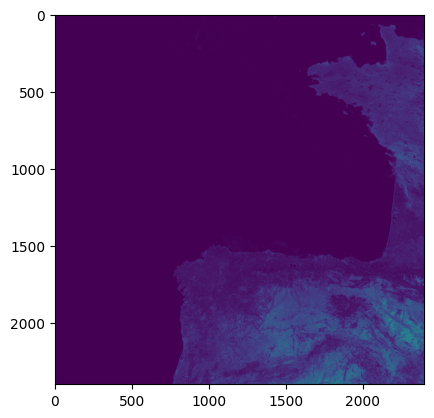

In [11]:
plt.imshow(arr_modis[:,:,0])

* MODISのデータは、各スペクトルバンドの反射率（反射/入射の割合）を表しています。反射率とは、スペクトルの各部分のエネルギーのうち、各スペクトルバンドで地球に反射されたエネルギーの割合を示す指標である。したがって、値は[0-1]の範囲となる。0は反射のない（すべてのエネルギーが吸収されている）画素を表し、1はすべてのエネルギーが反射されていることを表す。

* これらの値は浮動小数点数として保存する必要があるが、スペースを節約するために2バイトの整数（int16 vs float32）を使用し、大きな数で除算して再スケーリングするのが一般的である。

* これらの画像を解釈する前に、保存されている値を反射率値[0-1.0]に変換する必要があります。  モディスのデータに対してこの変換を行うには、10,000の変換係数を使用します。(Pythonでは1e4 == 1*10^4 == 10,000のような方法を使うことができます。）